In [20]:
import numpy as np                                     # Matlab like syntax for linear algebra and functions
from numpy.linalg import matrix_power                  # This is to raise matrices to powers
import matplotlib.pyplot as plt                        # Plots and figures like you know them from Matlab
import seaborn as sns                                  # Make the plots nicer to look at
from iminuit import Minuit                             # The actual fitting tool, better than scipy's
import sys                                             # Module to see files and folders in directories
from scipy import stats
import sympy as sp

In [21]:
np.random.seed(50)                                     # Set the seed for the random number generator

sys.path.append('../External_Functions')                       # Add the folder with the functions to the path
from ExternalFunctions import Chi2Regression, BinnedLH, UnbinnedLH, add_text_to_ax, nice_string_output # Import the functions from the folder
from MyFunctions import *
matplotlib_plotparameters()                                    # Set the plot parameters to something nice

# 3.2

In [22]:
def func(x,sig):
    return x/sig**2*sp.exp(-x**2/(2*sig**2))

xlim = [0, sp.oo]

In [23]:

x=sp.symbols('x')
sgm=sp.symbols('sigma')

eq = func(x,2)
Npoints = 1000

inv_func = tranform_method(eq,x,Npoints,xlim,inv_func=True)

[-2*sqrt(2)*sqrt(log(-1/(y - 1))), 2*sqrt(2)*sqrt(log(-1/(y - 1)))]


In [24]:
Nbins = 25

b_test_width, range_test = bins_create(inv_func,Nbins)
print(b_test_width)
count_test, error_test,c_bin_test, bin_w_test, dmin_test,dmax_test = hist_create(inv_func,Nbins,b_test_width,range_test[0],range_test[1])


plt.close()

0.3148588342866654


In [25]:
print(dmin_test,dmax_test)

0.12151907484742534 7.99298993201406


In [26]:
def ray(x,sig):
    return b_test_width*Npoints *x/sig**2*np.exp(-x**2/(2*sig**2))

In [27]:
ray_fit = Minuit(Chi2Regression(ray, c_bin_test, count_test, error_test),sig=2)
ray_fit.errordef = 1
ray_fit.migrad()


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 19.39                      │              Nfcn = 13               │
│ EDM = 9.1e-07 (Goal: 0.0002)     │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ sig  │   1.99    │   0.04    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌─────┬────────┐
│     │    sig │
├─────┼────────┤
│ sig │ 0.0013 │
└─────┴────────┘

In [28]:
raychi2=chi2_prob(ray_fit,len(count_test)-1)
print(raychi2)

(0.4964316996853506, 20)


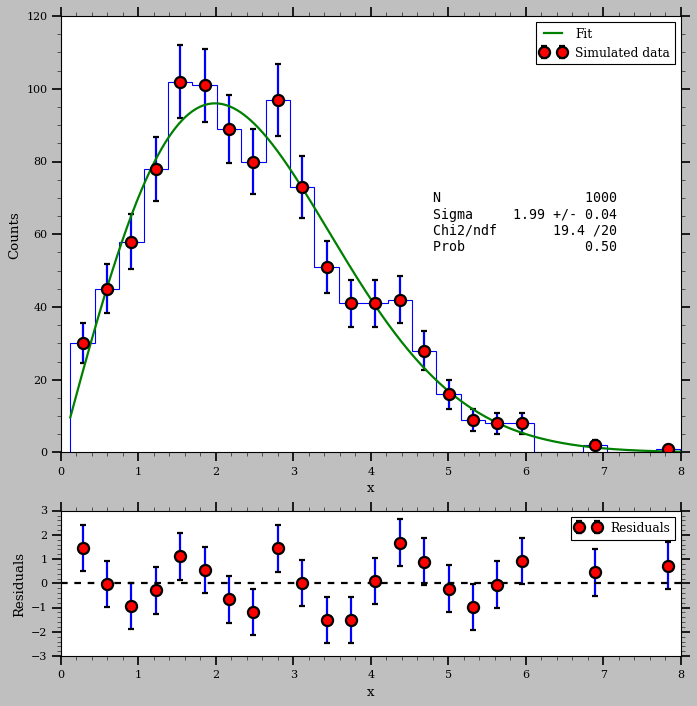

In [29]:
xes = np.linspace(dmin_test,dmax_test,10000)
#plot with residual plot in bottom
fig1, ax1 = plt.subplots(2,1,figsize=(10,10),gridspec_kw={'height_ratios': [3, 1]})
ax1[0].errorbar(c_bin_test, count_test, yerr=error_test, fmt='o', label='Simulated data')
ax1[0].hist(inv_func,bins=Nbins,range=(dmin_test,dmax_test),histtype='step',color='blue')
ax1[0].plot(xes,ray(xes,ray_fit.values['sig']),label='Fit')
ax1[0].set_xlabel('x')

d = {'N': f"{Npoints:.0f}",

    'Sigma': [ray_fit.values['sig'], ray_fit.errors['sig']],
    'Chi2/ndf': f"{ray_fit.fval:.1f} /{raychi2[1]:.0f}",
    'Prob': f"{raychi2[0]:.2f}"}

text = nice_string_output(d, extra_spacing=2, decimals=2)
add_text_to_ax(0.6, 0.6, text, ax1[0], fontsize=12)


resid = (count_test-ray(c_bin_test,ray_fit.values['sig']))/error_test
res_std = np.std(resid)
ax1[1].errorbar(c_bin_test, resid, yerr = res_std, fmt='o', label='Residuals')
ax1[1].axhline(0, color='black', linestyle='--')
ax1[1].set_xlabel('x')
ax1[1].set_ylabel('Residuals')
ax1[0].set_ylabel('Counts')
ax1[0].legend()
ax1[1].legend()

fig1.savefig('Figures/OneRayleigh.png')


In [30]:
def ray(x,sig):
    return b_test_width*Npoints *x/sig**2*np.exp(-x**2/(2*sig**2))

In [31]:
tests = 18
bum = 20
points = np.logspace(1.7,3.69,tests).astype(int)

binnies = (points/16).astype(int)
print(points)
sigmas = np.zeros(len(points))
sigmas_err = np.zeros(len(points))
for j in range(tests):
    sigarray = np.zeros(bum)
    brin_width, rrange_test = bins_create(inv_func,binnies[j])
    for i in range(bum):


        inv_func1 = tranform_method(eq,x,points[j],xlim)


        count_testr, error_testr,c_bin_testr, bin_w_testr, dmin_testr,dmax_testr = hist_create(inv_func1,binnies[j],brin_width,rrange_test[0],range_test[1])
        plt.close()
        ray_fit = Minuit(Chi2Regression(ray, c_bin_testr, count_testr, error_testr),sig=2)
        ray_fit.errordef = 1
        ray_fit.migrad();
        sigarray[i] = ray_fit.errors['sig']
    
    sigmas[j] =np.mean(sigarray)
    sigmas_err[j] = np.std(sigarray)/len(sigarray)**0.5



[  50   65   85  112  147  192  252  330  432  566  742  971 1272 1666
 2181 2856 3740 4897]


In [32]:
def erprop(N,a,b):
    return b+a/N**0.5

inv_pro_fit = Minuit(Chi2Regression(erprop, points, sigmas, sigmas_err),a=0.5,b=0.5)
inv_pro_fit.errordef = 1
inv_pro_fit.migrad()


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 30.98                      │              Nfcn = 39               │
│ EDM = 1.38e-17 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   0.433   │   0.004   │            │            │         │         │       │
│ 1 │ b    │ -0.21e-3  │  0.07e-3  │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────────────────────┐
│   │         a         b │
├───┼─────────────────────┤
│ a │  1.58e-05 -2.71e-07 │
│ b │ -2.71e-07  5.07e-09 │
└───┴─────────────────────┘

In [33]:
a,b = inv_pro_fit.values['a'],inv_pro_fit.values['b']
invchi = inv_pro_fit.fval
inv_pro_chi,inv_pro_ndf = chi2_prob(inv_pro_fit,len(points)-2)
print(inv_pro_chi,inv_pro_ndf)

0.013538113669731597 16


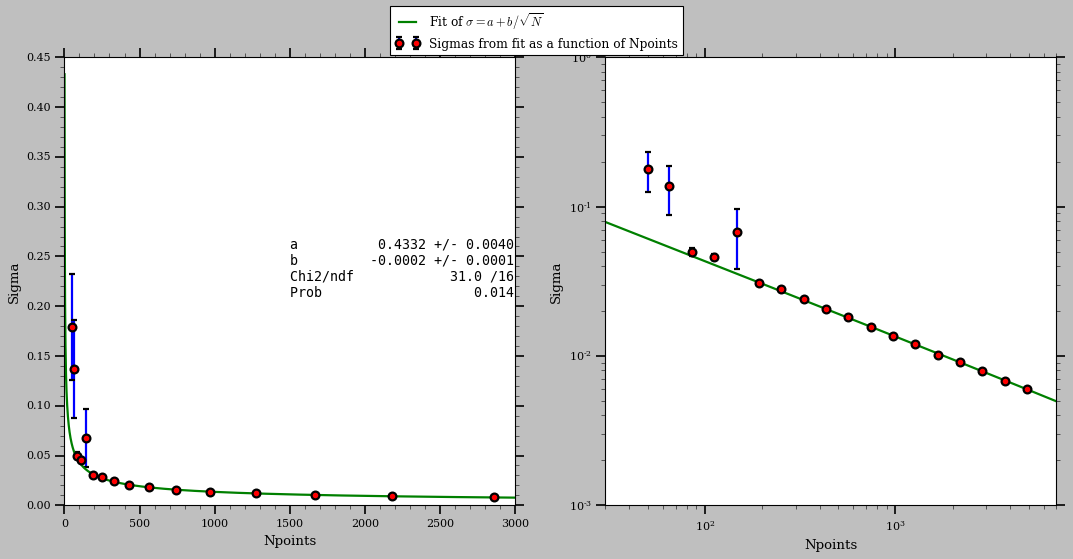

In [36]:
inv_pr_array = np.linspace(1,7000,10000)

fig2, ax2 = plt.subplots(1,2,figsize=(16,7))

ax2[0].errorbar(points,sigmas,yerr=sigmas_err,fmt='o',label='Sigmas from fit as a function of Npoints',ms=7)
ax2[1].errorbar(points,sigmas,yerr=sigmas_err,fmt='o',ms=7)
ax2[0].plot(inv_pr_array,erprop(inv_pr_array,a,b),label=r'Fit of $\sigma = a + b/\sqrt{N}$')
ax2[1].plot(inv_pr_array,erprop(inv_pr_array,a,b))

d = {'a': [inv_pro_fit.values['a'], inv_pro_fit.errors['a']],
    'b': [inv_pro_fit.values['b'], inv_pro_fit.errors['b']],
    'Chi2/ndf': f"{invchi:.1f} /{inv_pro_ndf:.0f}",
    'Prob': f"{inv_pro_chi:.3f}"}

text2 = nice_string_output(d, extra_spacing=2, decimals=4)
add_text_to_ax(0.5, 0.6, text2, ax2[0], fontsize=12)


ax2[0].set_xlim(0,3000)
ax2[0].set_xlabel('Npoints')
ax2[0].set_ylabel('Sigma')

ax2[1].set_xlabel('Npoints')
ax2[1].set_ylabel('Sigma')
ax2[1].set_yscale('log')
ax2[1].set_xscale('log')
ax2[1].set_xlim(30,7000)
fig2.legend(loc='upper center')
fig2.savefig('Figures/manyrayleigh.png')